6. Using the data from Question 3, write code to analyze the data and answer the following questions
Insights to be drawn -

Get all Pokemons whose spawn rate is less than 5%
Get all Pokemons that have less than 4 weaknesses
Get all Pokemons that have no multipliers at all
Get all Pokemons that do not have more than 2 evolutions
Get all Pokemons whose spawn time is less than 300 seconds.
Note - spawn time format is "05:32”, so assume “minute: second” format and perform the analysis.

Get all Pokemon who have more than two types of capabilities
Data Attributes

id: Identification Number - int
num: Number of the Pokémon in the official Pokédex - int
name: Pokémon name - string
img: URL to an image of this Pokémon - string
type: Pokémon type -string
height: Pokémon height - float
weight: Pokémon weight - float
candy: type of candy used to evolve Pokémon or given when transferred - string
candy_count: the amount of candies required to evolve - int
egg: Number of kilometers to travel to hatch the egg - float
spawn_chance: Percentage of spawn chance (NEW) - float
avg_spawns: Number of this pokemon on 10.000 spawns (NEW) - int
spawn_time: Spawns most active at the time on this field. Spawn times are the same for all time zones and are expressed in local time. (NEW) - “minutes: seconds”
multipliers: Multiplier of Combat Power (CP) for calculating the CP after evolution See below - list of int
weakness: Types of Pokémon this Pokémon is weak to - list of strings
next_evolution: Number and Name of successive evolutions of Pokémon - list of dict
prev_evolution: Number and Name of previous evolutions of Pokémon - - list of dict

In [1]:
# Installing required packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading our pokemon dataset

dataset = pd.read_excel('pokemon_cleaned.xlsx')

In [3]:
dataset.head()      # Top 5 records of the dataset.

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,multipliers,weakness,next_evolution,prev_evolution,spawn_time_total_seconds
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"Grass, Poison",0.71,6.9,Bulbasaur Candy,25.0,2,0.690,69.0,[1.58],"Fire, Ice, Flying, Psychic","['Ivysaur', 'Venusaur']",[],1200.0
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"Grass, Poison",0.99,13.0,Bulbasaur Candy,100.0,0,0.042,4.2,"[1.2, 1.6]","Fire, Ice, Flying, Psychic",['Venusaur'],['Bulbasaur'],420.0
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"Grass, Poison",2.01,100.0,Bulbasaur Candy,NaN,0,0.017,1.7,NaN,"Fire, Ice, Flying, Psychic",[],"['Bulbasaur', 'Ivysaur']",690.0
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,Fire,0.61,8.5,Charmander Candy,25.0,2,0.253,25.3,[1.65],"Water, Ground, Rock","['Charmeleon', 'Charizard']",[],525.0
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,Fire,1.09,19.0,Charmander Candy,100.0,0,0.012,1.2,[1.79],"Water, Ground, Rock",['Charizard'],['Charmander'],1140.0


Get all Pokemons whose spawn rate is less than 5%

In [11]:
dataset[dataset["spawn_chance"] < 0.05]

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,multipliers,weakness,next_evolution,prev_evolution,spawn_time_total_seconds
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"Grass, Poison",0.99,13.0,Bulbasaur Candy,100.0,0,0.0420,4.20,"[1.2, 1.6]","Fire, Ice, Flying, Psychic",['Venusaur'],['Bulbasaur'],420.0
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"Grass, Poison",2.01,100.0,Bulbasaur Candy,NaN,0,0.0170,1.70,NaN,"Fire, Ice, Flying, Psychic",[],"['Bulbasaur', 'Ivysaur']",690.0
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,Fire,1.09,19.0,Charmander Candy,100.0,0,0.0120,1.20,[1.79],"Water, Ground, Rock",['Charizard'],['Charmander'],1140.0
5,6,6,Charizard,http://www.serebii.net/pokemongo/pokemon/006.png,"Fire, Flying",1.70,90.5,Charmander Candy,NaN,0,0.0031,0.31,NaN,"Water, Electric, Rock",[],"['Charmander', 'Charmeleon']",814.0
7,8,8,Wartortle,http://www.serebii.net/pokemongo/pokemon/008.png,Water,0.99,22.5,Squirtle Candy,100.0,0,0.0340,3.40,[1.4],"Electric, Grass",['Blastoise'],['Squirtle'],422.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,146,Moltres,http://www.serebii.net/pokemongo/pokemon/146.png,"Fire, Flying",2.01,60.0,None,NaN,0,0.0000,0.00,NaN,"Water, Electric, Rock",[],[],NaN
147,148,148,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,Dragon,3.99,16.5,Dratini Candy,100.0,0,0.0200,2.00,[2.05],"Ice, Dragon, Fairy",['Dragonite'],['Dratini'],717.0
148,149,149,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"Dragon, Flying",2.21,210.0,Dratini Candy,NaN,0,0.0011,0.11,NaN,"Ice, Rock, Dragon, Fairy",[],"['Dratini', 'Dragonair']",1418.0
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,Psychic,2.01,122.0,None,NaN,0,0.0000,0.00,NaN,"Bug, Ghost, Dark",[],[],NaN


In [12]:
spawn_rate = dataset[dataset["spawn_chance"] < 5]       # Creating new variable as 'spawn_rate' which will store values of all Pokemons whose spawn rate is less than 5%

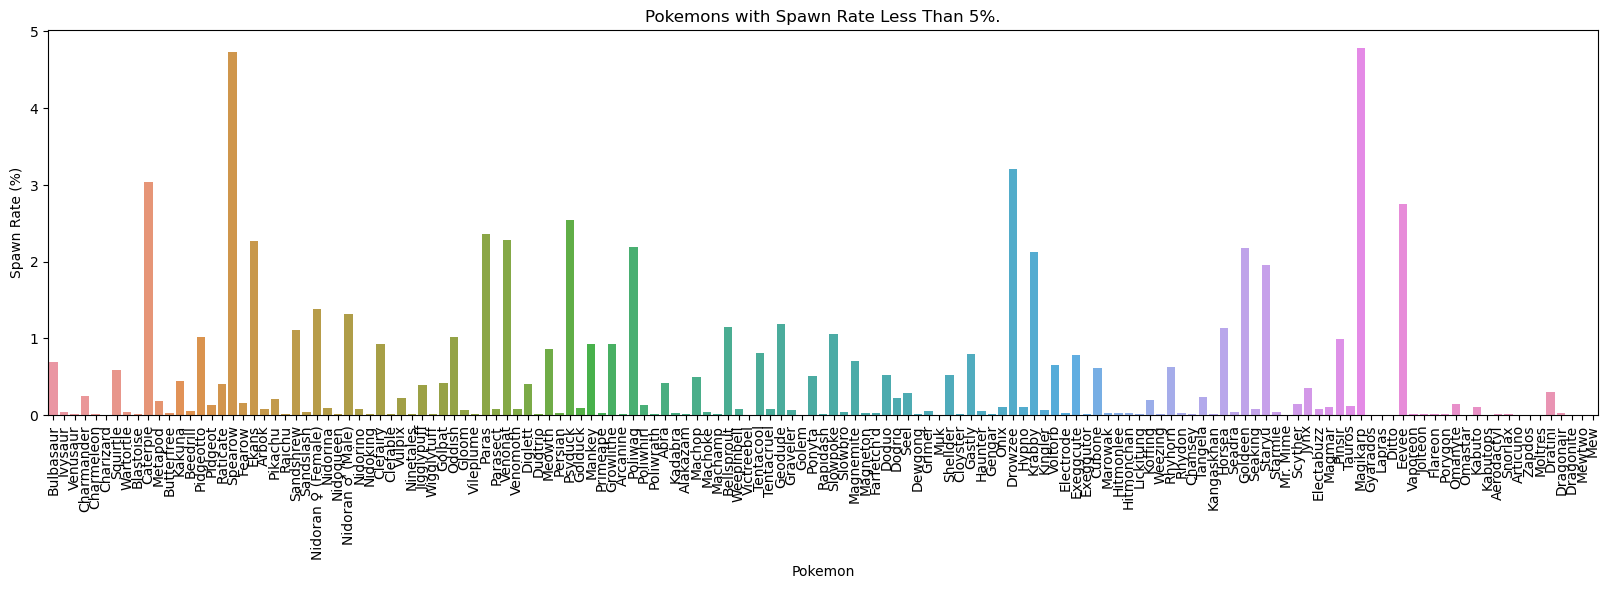

In [13]:
# Bar plot for all Pokemons whose spawn rate is less than 5%

plt.figure(figsize=(20,5))
sns.barplot(x = "name", y = "spawn_chance", data = spawn_rate)
plt.title("Pokemons with Spawn Rate Less Than 5%.")
plt.xlabel("Pokemon")
plt.ylabel("Spawn Rate (%)")
plt.xticks(rotation=90)
plt.show()

In [14]:
dataset["weakness"] = dataset["weakness"].apply(lambda x: x.split(", "))

In [15]:
weaknesses = dataset[dataset["weakness"].apply(len) < 4]       # Creating new variable as 'weaknesses' which will store values of all Pokemons that have less than 4 weaknesses

In [16]:
weaknesses

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,multipliers,weakness,next_evolution,prev_evolution,spawn_time_total_seconds
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,Fire,0.61,8.5,Charmander Candy,25.0,2,0.2530,25.30,[1.65],"[Water, Ground, Rock]","['Charmeleon', 'Charizard']",[],525.0
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,Fire,1.09,19.0,Charmander Candy,100.0,0,0.0120,1.20,[1.79],"[Water, Ground, Rock]",['Charizard'],['Charmander'],1140.0
5,6,6,Charizard,http://www.serebii.net/pokemongo/pokemon/006.png,"Fire, Flying",1.70,90.5,Charmander Candy,NaN,0,0.0031,0.31,NaN,"[Water, Electric, Rock]",[],"['Charmander', 'Charmeleon']",814.0
6,7,7,Squirtle,http://www.serebii.net/pokemongo/pokemon/007.png,Water,0.51,9.0,Squirtle Candy,25.0,2,0.5800,58.00,[2.1],"[Electric, Grass]","['Wartortle', 'Blastoise']",[],265.0
7,8,8,Wartortle,http://www.serebii.net/pokemongo/pokemon/008.png,Water,0.99,22.5,Squirtle Candy,100.0,0,0.0340,3.40,[1.4],"[Electric, Grass]",['Blastoise'],['Squirtle'],422.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,146,Moltres,http://www.serebii.net/pokemongo/pokemon/146.png,"Fire, Flying",2.01,60.0,None,NaN,0,0.0000,0.00,NaN,"[Water, Electric, Rock]",[],[],NaN
146,147,147,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,Dragon,1.80,3.3,Dratini Candy,25.0,10,0.3000,30.00,"[1.83, 1.84]","[Ice, Dragon, Fairy]","['Dragonair', 'Dragonite']",[],401.0
147,148,148,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,Dragon,3.99,16.5,Dratini Candy,100.0,0,0.0200,2.00,[2.05],"[Ice, Dragon, Fairy]",['Dragonite'],['Dratini'],717.0
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,Psychic,2.01,122.0,None,NaN,0,0.0000,0.00,NaN,"[Bug, Ghost, Dark]",[],[],NaN


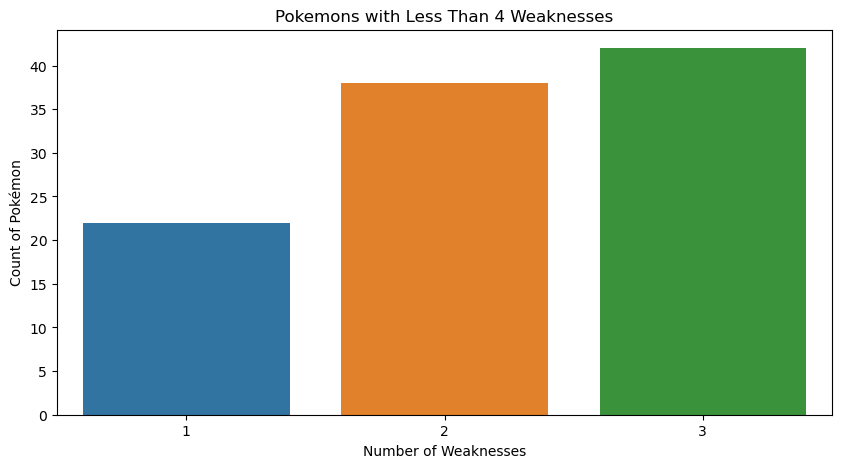

In [17]:
# Bar plot for Pokemons that have less than 4 weaknesses

plt.figure(figsize=(10, 5))
sns.countplot(x=weaknesses["weakness"].apply(len))
plt.title("Pokemons with Less Than 4 Weaknesses")
plt.xlabel("Number of Weaknesses")
plt.ylabel("Count of Pokémon")
plt.show()

In [18]:
dataset.head()      # Top 5 records of the dataset

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,multipliers,weakness,next_evolution,prev_evolution,spawn_time_total_seconds
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"Grass, Poison",0.71,6.9,Bulbasaur Candy,25.0,2,0.690,69.0,[1.58],"[Fire, Ice, Flying, Psychic]","['Ivysaur', 'Venusaur']",[],1200.0
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"Grass, Poison",0.99,13.0,Bulbasaur Candy,100.0,0,0.042,4.2,"[1.2, 1.6]","[Fire, Ice, Flying, Psychic]",['Venusaur'],['Bulbasaur'],420.0
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"Grass, Poison",2.01,100.0,Bulbasaur Candy,NaN,0,0.017,1.7,NaN,"[Fire, Ice, Flying, Psychic]",[],"['Bulbasaur', 'Ivysaur']",690.0
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,Fire,0.61,8.5,Charmander Candy,25.0,2,0.253,25.3,[1.65],"[Water, Ground, Rock]","['Charmeleon', 'Charizard']",[],525.0
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,Fire,1.09,19.0,Charmander Candy,100.0,0,0.012,1.2,[1.79],"[Water, Ground, Rock]",['Charizard'],['Charmander'],1140.0


In [19]:
unique_multipliers = dataset["multipliers"].unique()    # Checking unique values in multipliers column.
print(unique_multipliers)

['[1.58]' '[1.2, 1.6]' nan '[1.65]' '[1.79]' '[2.1]' '[1.4]' '[1.05]'
 '[3.55, 3.79]' '[1.01, 1.09]' '[3.01, 3.41]' '[1.71, 1.92]'
 '[2.55, 2.73]' '[2.66, 2.68]' '[2.21, 2.27]' '[2.34]' '[2.45]'
 '[1.63, 2.48]' '[1.83, 2.48]' '[1.64, 1.7]' '[1.83]' '[2.03, 2.14]'
 '[2.74, 2.81]' '[1.85]' '[2.6, 3.67]' '[1.5]' '[1.49]' '[2.02]'
 '[1.86, 1.9]' '[2.69]' '[1.98]' '[2.27]' '[2.17, 2.28]' '[2.31, 2.36]'
 '[1.72, 1.73]' '[1.95]' '[1.36, 1.95]' '[1.64, 1.65]' '[1.7]' '[1.57]'
 '[1.59]' '[2.52]' '[1.75, 1.76]' '[1.64, 1.72]' '[1.48, 1.5]' '[2.21]'
 '[2.16, 2.17]' '[2.19, 2.24]' '[1.04, 1.96]' '[2.44]' '[2.65]' '[1.78]'
 '[1.56, 1.8]' '[2.08, 2.09]' '[2.36, 2.4]' '[2.01, 2.02]' '[2.7, 3.18]'
 '[1.67]' '[1.11]' '[1.91]' '[2.23]' '[2.15, 2.2]' '[2.38, 2.41]'
 '[10.1, 11.8]' '[2.02, 2.64]' '[2.12]' '[1.97, 2.37]' '[1.83, 1.84]'
 '[2.05]']


In [20]:
# Creating new variable as 'no_multipliers' which will store values of all Pokemons that have no multipliers at all.

no_multipliers = dataset[dataset["multipliers"].apply(lambda x: isinstance(x, float) or len(x) == 0)]

In [21]:
no_multipliers

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,multipliers,weakness,next_evolution,prev_evolution,spawn_time_total_seconds
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"Grass, Poison",2.01,100.0,Bulbasaur Candy,NaN,0,0.0170,1.70,NaN,"[Fire, Ice, Flying, Psychic]",[],"['Bulbasaur', 'Ivysaur']",690.0
5,6,6,Charizard,http://www.serebii.net/pokemongo/pokemon/006.png,"Fire, Flying",1.70,90.5,Charmander Candy,NaN,0,0.0031,0.31,NaN,"[Water, Electric, Rock]",[],"['Charmander', 'Charmeleon']",814.0
8,9,9,Blastoise,http://www.serebii.net/pokemongo/pokemon/009.png,Water,1.60,85.5,Squirtle Candy,NaN,0,0.0067,0.67,NaN,"[Electric, Grass]",[],"['Squirtle', 'Wartortle']",6.0
11,12,12,Butterfree,http://www.serebii.net/pokemongo/pokemon/012.png,"Bug, Flying",1.09,32.0,Caterpie Candy,NaN,0,0.0220,2.20,NaN,"[Fire, Electric, Ice, Flying, Rock]",[],"['Caterpie', 'Metapod']",323.0
14,15,15,Beedrill,http://www.serebii.net/pokemongo/pokemon/015.png,"Bug, Poison",0.99,29.5,Weedle Candy,NaN,0,0.0510,5.10,NaN,"[Fire, Flying, Psychic, Rock]",[],"['Weedle', 'Kakuna']",290.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,145,145,Zapdos,http://www.serebii.net/pokemongo/pokemon/145.png,"Electric, Flying",1.60,52.6,None,NaN,0,0.0000,0.00,NaN,"[Ice, Rock]",[],[],NaN
145,146,146,Moltres,http://www.serebii.net/pokemongo/pokemon/146.png,"Fire, Flying",2.01,60.0,None,NaN,0,0.0000,0.00,NaN,"[Water, Electric, Rock]",[],[],NaN
148,149,149,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"Dragon, Flying",2.21,210.0,Dratini Candy,NaN,0,0.0011,0.11,NaN,"[Ice, Rock, Dragon, Fairy]",[],"['Dratini', 'Dragonair']",1418.0
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,Psychic,2.01,122.0,None,NaN,0,0.0000,0.00,NaN,"[Bug, Ghost, Dark]",[],[],NaN


In [22]:
# Creating new variable as 'no_more_than_2_evolutions' which will store values of all Pokemons that do not have more than 2 evolutions.

no_more_than_2_evolutions = dataset[dataset["next_evolution"].apply(lambda x: len(x) if isinstance(x, list) else 0) <= 2]

In [26]:
no_more_than_2_evolutions

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,multipliers,weakness,next_evolution,prev_evolution,spawn_time_total_seconds
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"Grass, Poison",0.71,6.9,Bulbasaur Candy,25.0,2,0.6900,69.00,[1.58],"[Fire, Ice, Flying, Psychic]","['Ivysaur', 'Venusaur']",[],1200.0
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"Grass, Poison",0.99,13.0,Bulbasaur Candy,100.0,0,0.0420,4.20,"[1.2, 1.6]","[Fire, Ice, Flying, Psychic]",['Venusaur'],['Bulbasaur'],420.0
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"Grass, Poison",2.01,100.0,Bulbasaur Candy,NaN,0,0.0170,1.70,NaN,"[Fire, Ice, Flying, Psychic]",[],"['Bulbasaur', 'Ivysaur']",690.0
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,Fire,0.61,8.5,Charmander Candy,25.0,2,0.2530,25.30,[1.65],"[Water, Ground, Rock]","['Charmeleon', 'Charizard']",[],525.0
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,Fire,1.09,19.0,Charmander Candy,100.0,0,0.0120,1.20,[1.79],"[Water, Ground, Rock]",['Charizard'],['Charmander'],1140.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,147,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,Dragon,1.80,3.3,Dratini Candy,25.0,10,0.3000,30.00,"[1.83, 1.84]","[Ice, Dragon, Fairy]","['Dragonair', 'Dragonite']",[],401.0
147,148,148,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,Dragon,3.99,16.5,Dratini Candy,100.0,0,0.0200,2.00,[2.05],"[Ice, Dragon, Fairy]",['Dragonite'],['Dratini'],717.0
148,149,149,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"Dragon, Flying",2.21,210.0,Dratini Candy,NaN,0,0.0011,0.11,NaN,"[Ice, Rock, Dragon, Fairy]",[],"['Dratini', 'Dragonair']",1418.0
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,Psychic,2.01,122.0,None,NaN,0,0.0000,0.00,NaN,"[Bug, Ghost, Dark]",[],[],NaN


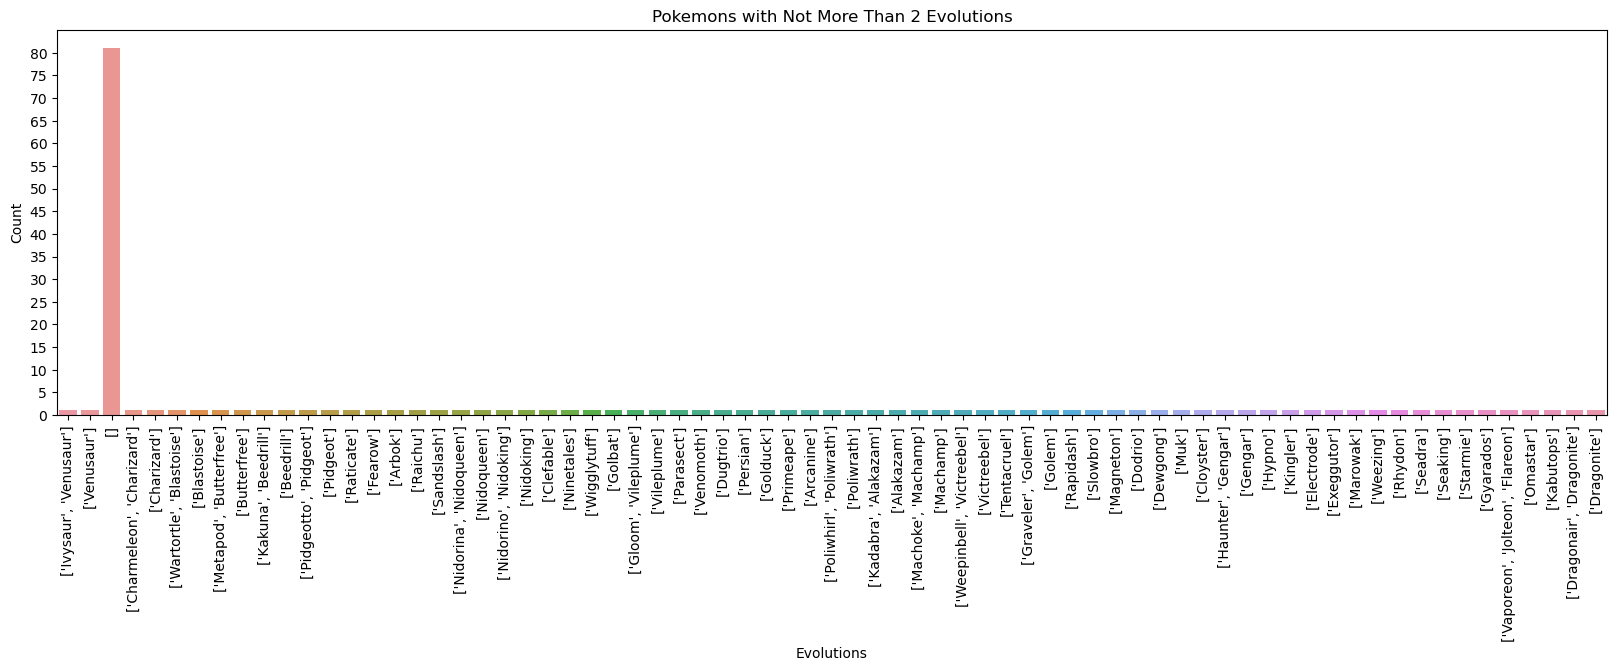

In [27]:
# Bar plot for Pokemons that do not have more than 2 evolutions

plt.figure(figsize=(20, 5))
sns.countplot(x="next_evolution", data=no_more_than_2_evolutions)
plt.title("Pokemons with Not More Than 2 Evolutions")
plt.xlabel("Evolutions")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.yticks(range(0, 85, 5))
plt.show()

In [28]:
# Creating new variable as 'spawn_time_less_than_300' which will store values of all Pokemons whose spawn time is less than 300 seconds.

spawn_time_less_than_300 = dataset[dataset["spawn_time_total_seconds"] < 300]

In [29]:
spawn_time_less_than_300

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,multipliers,weakness,next_evolution,prev_evolution,spawn_time_total_seconds
6,7,7,Squirtle,http://www.serebii.net/pokemongo/pokemon/007.png,Water,0.51,9.0,Squirtle Candy,25.0,2,0.5800,58.00,[2.1],"[Electric, Grass]","['Wartortle', 'Blastoise']",[],265.0
8,9,9,Blastoise,http://www.serebii.net/pokemongo/pokemon/009.png,Water,1.60,85.5,Squirtle Candy,NaN,0,0.0067,0.67,NaN,"[Electric, Grass]",[],"['Squirtle', 'Wartortle']",6.0
10,11,11,Metapod,http://www.serebii.net/pokemongo/pokemon/011.png,Bug,0.71,9.9,Caterpie Candy,50.0,0,0.1870,18.70,"[3.55, 3.79]","[Fire, Flying, Rock]",['Butterfree'],['Caterpie'],131.0
12,13,13,Weedle,http://www.serebii.net/pokemongo/pokemon/013.png,"Bug, Poison",0.30,3.2,Weedle Candy,12.0,2,7.1200,712.00,"[1.01, 1.09]","[Fire, Flying, Psychic, Rock]","['Kakuna', 'Beedrill']",[],141.0
13,14,14,Kakuna,http://www.serebii.net/pokemongo/pokemon/014.png,"Bug, Poison",0.61,10.0,Weedle Candy,50.0,0,0.4400,44.00,"[3.01, 3.41]","[Fire, Flying, Psychic, Rock]",['Beedrill'],['Weedle'],150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,128,128,Tauros,http://www.serebii.net/pokemongo/pokemon/128.png,Normal,1.40,88.4,None,NaN,5,0.1200,12.00,NaN,[Fighting],[],[],37.0
129,130,130,Gyarados,http://www.serebii.net/pokemongo/pokemon/130.png,"Water, Flying",6.50,235.0,Magikarp Candy,NaN,0,0.0032,0.32,NaN,"[Electric, Rock]",[],['Magikarp'],135.0
134,135,135,Jolteon,http://www.serebii.net/pokemongo/pokemon/135.png,Electric,0.79,24.5,None,NaN,0,0.0120,1.20,NaN,[Ground],[],['Eevee'],150.0
136,137,137,Porygon,http://www.serebii.net/pokemongo/pokemon/137.png,Normal,0.79,36.5,None,NaN,5,0.0120,1.20,NaN,[Fighting],[],[],169.0


Get all Pokemon who have more than two types of capabilities

In [30]:
# Creating new variable as 'more_than_two_types' which will store values of all Pokemons who have more than two types of capabilities.

more_than_two_types = dataset[dataset["type"].apply(lambda x: len(x.split(", "))) > 2]

In [31]:
more_than_two_types

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,multipliers,weakness,next_evolution,prev_evolution,spawn_time_total_seconds
